<a href="https://colab.research.google.com/github/Harshpatel44/ML-A4/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`#author: Harsh Patel`

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as Func 

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [0]:
iris = datasets.load_iris()

Displaying The IRIS Dataset

In [0]:
# converting the dataset to a numpy array
data_iris = np.array(iris.data)
output = np.array(iris.target)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Standardising the data

In [0]:
data_iris = StandardScaler().fit_transform(data_iris)
print(pd.DataFrame(data=data_iris,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']))

     Sepal Length  Sepal Width  Petal Length  Petal Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


Using PCA to reduce features

In [0]:
pca = decomposition.PCA(n_components=4)
pca_iris=pca.fit_transform(data_iris)
print(pd.DataFrame(data=pca_iris,columns=['PC1','PC2','PC3','PC4']))

          PC1       PC2       PC3       PC4
0   -2.264703  0.480027 -0.127706 -0.024168
1   -2.080961 -0.674134 -0.234609 -0.103007
2   -2.364229 -0.341908  0.044201 -0.028377
3   -2.299384 -0.597395  0.091290  0.065956
4   -2.389842  0.646835  0.015738  0.035923
..        ...       ...       ...       ...
145  1.870503  0.386966  0.256274 -0.389257
146  1.564580 -0.896687 -0.026371 -0.220192
147  1.521170  0.269069  0.180178 -0.119171
148  1.372788  1.011254  0.933395 -0.026129
149  0.960656 -0.024332  0.528249  0.163078

[150 rows x 4 columns]


Visualizing for first two PCA

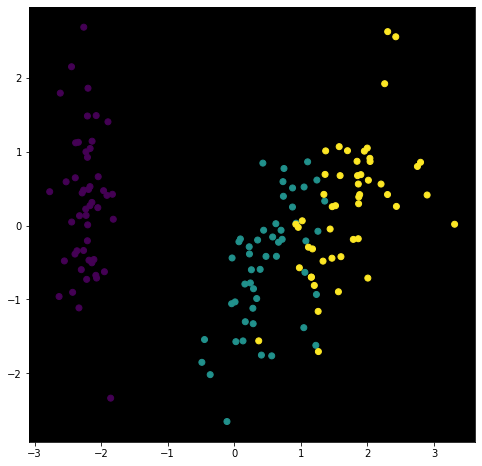

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,0],pca_iris[:,1],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

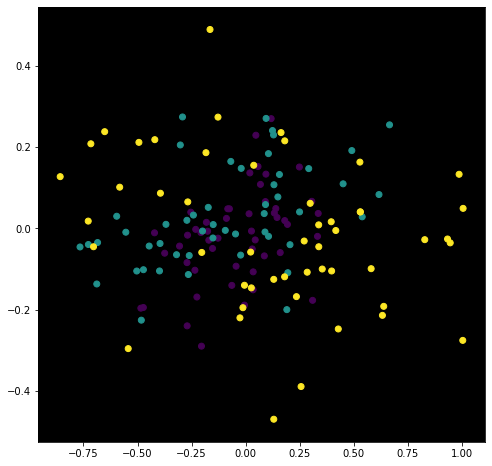

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(pca_iris[:,2],pca_iris[:,3],c=output)
ax = plt.gca()
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.show()

Variance ratio of each Principal Component

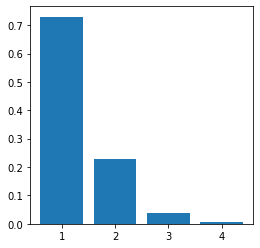

[0.72962445 0.22850762 0.03668922 0.00517871]


In [0]:
plt.figure(figsize=(4,4))
plt.bar([1,2,3,4],pca.explained_variance_ratio_)
plt.show()
print(pca.explained_variance_ratio_)

                     SCREE PLOT 

**b) PCA FOR FEATURE SELECTION**

Loading MNIST data

In [0]:
mnist = datasets.fetch_openml('mnist_784')

Splitting the training and testing data & Vizualising samples of the dataset.

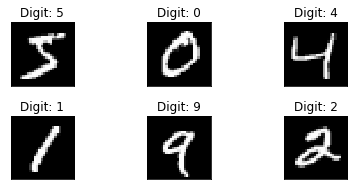

In [5]:
train = mnist.data[:60000,:]
test =  mnist.data[60000:,:]
y_train = mnist.target[:60000]
y_test =  mnist.target[60000:]

#converting labels to tensors
y_train=np.array(y_train,dtype=np.int64)
y_test=np.array(y_test,dtype=np.int64)
y_train = torch.from_numpy(y_train).to(device)
y_test = torch.from_numpy(y_test).to(device)
train_temp = np.reshape(train,(60000,28,28))
fig = plt.figure()
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_temp[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Applying PCA and finding features

Simple Neural Network to test different variances of PCA

In [0]:
def Model(pca_train,pca_test,y_train,y_test,epochs=2,lr=0.001):
  loss_list=[]
  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()
      self.fc1 = nn.Linear(pca_train.shape[1],84)
      self.fc2 = nn.Linear(84,10)
    def forward(self,x):
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  #Net.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(Net.parameters(), lr = lr,momentum = 0.9)

  for e in range(epochs):
    optimizer.zero_grad()
    output = Net(pca_train)
    loss = criterion(output,y_train)
    loss.backward(retain_graph=True)
    optimizer.step()
    loss_list.append(loss.item())

  #Evaluating on training data
  correct = 0
  total = 0
  with torch.no_grad():
      outputs = Net(pca_train)
      _, predicted = torch.max(outputs.data, 1)
      total += y_train.shape[0]
      correct += (predicted == y_train).sum().item()
  train_acc = correct / total
  #Evaluating on test data
  correct = 0
  total = 0
  with torch.no_grad():
      outputs = Net(pca_test)
      _, predicted = torch.max(outputs.data, 1)
      total += y_test.shape[0]
      correct += (predicted == y_test).sum().item()
  test_acc = correct / total

  return loss_list, train_acc, test_acc

1. Standard Scaling the data, Feature selection using PCA, and classifying images from PCA features.<br>
2. Using different variances to select features and observing the accuracy of classification.

There is a list PCAs, which will maintain all the PCA objects.
the values in list will be accordingly as follows: <br><b> PCAs= [ variance, PCA_object, PCA_train(after transformation), PCA_test(after_transformation), PCA_train(after reconstruction), PCA_test(after reconstruction) ]<b>


In [7]:
PCAs=[]
#standard scaling
scalar = StandardScaler()
scalar.fit(train)
train=scalar.transform(train)
test=scalar.transform(test)
for i in [.50,.75,.90,.95]:
  #pca
  pca_mnist=decomposition.PCA(i)
  pca_mnist.fit(train)
  pca_train = pca_mnist.transform(train)
  pca_test = pca_mnist.transform(test)
  PCAs.append([i,pca_mnist,pca_train,pca_test,pca_train.shape[1]])
  #changing dtype
  pca_train=np.array(pca_train,dtype="float32")
  pca_test=np.array(pca_test,dtype="float32")
  
  #converting to tensors 
  pca_train=torch.from_numpy(pca_train)
  pca_test =torch.from_numpy(pca_test)
  y_train=y_train.to('cpu')
  y_test=y_test.to('cpu')
  losses,train_acc,test_acc = Model(pca_train,pca_test,y_train,y_test,200) #train_data,test_data,train_labels,test_labels,epochs
  print("Variance:",i," || training acc:",train_acc," || testing acc:",test_acc)

Variance: 0.5  || training acc: 0.81355  || testing acc: 0.8202
Variance: 0.75  || training acc: 0.7952833333333333  || testing acc: 0.8065
Variance: 0.9  || training acc: 0.77795  || testing acc: 0.7894
Variance: 0.95  || training acc: 0.7791166666666667  || testing acc: 0.7925


Reconstructing the image 

In [0]:
temp_PCAs=[]
for i in PCAs:
  pca_train=i[1].inverse_transform(i[2])
  pca_test=i[1].inverse_transform(i[3])
  temp_PCAs.append([i[0],i[1],i[2],i[3],i[4],pca_train,pca_test])
PCAs=temp_PCAs

Vizualizing digits after reconstruction

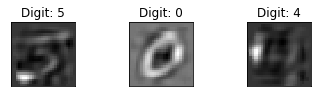

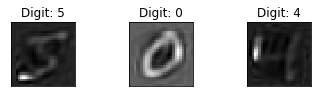

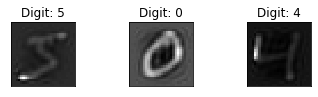

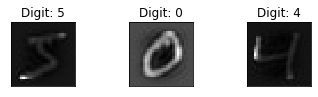

In [9]:
for i in range(4):
  digits=PCAs[i][5]
  digits=digits.reshape((60000,28,28))
  fig = plt.figure()
  for i in range(3):
    plt.subplot(3,3,i+1)
    plt.imshow(digits[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

Above is the Vizualization of images of different variances. <br> 
1st row- 0.50<br>
2nd row- 0.75<br>
3rd row- 0.90<br>
4th row- 0.95

Image Classification using  Reconstructed image data

In [0]:
def cnn_Model(pca_train,pca_test,y_train,y_test,epochs=2,batch_size=100,filter_size=3,pool_size=2,lr=0.001,dev='cpu'):
  ip_channel=1
  op_channel= 6
  conv_strides=1
  pool_strides=1
  loss_list=[]

  #formula to measure the output from convolution and pooling
  op_conv1 = (( pca_train.shape[2] - filter_size) / conv_strides) +1
  max_pool1 = (( op_conv1 - pool_size)/pool_strides) + 1
  
  train_loader = torch.utils.data.DataLoader(pca_train, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(pca_test, batch_size=batch_size, shuffle=False)
  y_train_loader = torch.utils.data.DataLoader(y_train, batch_size=batch_size, shuffle=False)
  y_test_loader = torch.utils.data.DataLoader(y_test, batch_size=batch_size, shuffle=False)

  class net(nn.Module):  
    def __init__(self):
      super(net,self).__init__()      
      if(str(dev)=='cuda'): 
        #print('running on cuda')
        self.conv1 = nn.Conv2d(ip_channel,op_channel,filter_size).cuda()
        self.pool = nn.MaxPool2d(pool_size,pool_strides).cuda()
        self.fc1 = nn.Linear(int(op_channel*max_pool1*max_pool1),84).cuda()
        self.fc2 = nn.Linear(84,10).cuda()
      else:
        #print('running on cpu')
        self.conv1 = nn.Conv2d(ip_channel,op_channel,filter_size)
        self.pool = nn.MaxPool2d(pool_size,pool_strides)
        self.fc1 = nn.Linear(int(op_channel*max_pool1*max_pool1),84)
        self.fc2 = nn.Linear(84,10)
    def forward(self,x):
      x = self.pool(Func.relu(self.conv1(x)))
      x=x.view(-1,int(op_channel*max_pool1*max_pool1))
      x=Func.relu(self.fc1(x))
      x=Func.log_softmax(self.fc2(x),dim=1)
      return x
  Net = net()
  if(dev=='cuda'):
    #print('device set on cuda')
    Net.to(device)  
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(Net.parameters(), lr = lr,momentum = 0.9)

  for e in range(epochs):
    for inputs,labels in zip(train_loader,y_train_loader):
      if(dev=='cuda'):
            inputs = inputs.to(device)
            labels = labels.to(device)
      optimizer.zero_grad()
      outputs = Net(inputs)
      loss = criterion(outputs,labels)
      loss.backward(retain_graph=True)
      optimizer.step()
      loss_list.append(loss.item())
  
  correct = 0
  total = 0
  with torch.no_grad():
      for inputs,labels in zip(train_loader,y_train_loader):
        if(dev=='cuda'):
            inputs = inputs.to(device)
            labels = labels.to(device)
        outputs = Net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  train_acc = correct / total

  correct = 0
  total = 0
  with torch.no_grad():    
      for inputs,labels in zip(train_loader,y_train_loader):  
        if(dev=='cuda'):
            inputs = inputs.to(device)
            labels = labels.to(device)
        outputs = Net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  test_acc = correct / total
  del Net,outputs,inputs
  return losses, train_acc, test_acc


Classification using <b>CNN</b> using different Variances, and observing its accuracies.

In [0]:
for i in PCAs: 
  pca_train=np.array(i[5],dtype="float32")
  pca_test=np.array(i[6],dtype="float32")
  #converting to tensors 
  pca_train=torch.from_numpy(pca_train)
  pca_test =torch.from_numpy(pca_test)
  pca_train=pca_train.reshape(pca_train.shape[0],1,28,28)
  pca_test=pca_test.reshape(pca_test.shape[0],1,28,28)
  losses,train_acc,test_acc = cnn_Model(pca_train,pca_test,y_train,y_test,5,100,4,2,0.001,'cpu') #epochs,batch_size,filter_size,pool_size,gpu or cpu
  print("Variance:",i[0]," || training acc:",train_acc," || testing acc:",test_acc)

Variance: 0.5  || training acc: 0.9576166666666667  || testing acc: 0.9576166666666667
Variance: 0.75  || training acc: 0.9714166666666667  || testing acc: 0.9714166666666667
Variance: 0.9  || training acc: 0.9702333333333333  || testing acc: 0.9702333333333333
Variance: 0.95  || training acc: 0.97485  || testing acc: 0.97485


While Applying PCA over the MNIST data with different variances, the accuracy is varied. difference between variance of .55 and .95 is very high. 

When the image was Reconstructed using PCA, and classification is done using CNN, there is very minor difference between accuracy of variance .55 PCA data and .95 PCA data.

Hence It can be implied that .55 variance has sufficiant information to classify the data
and Accuracy of reconstruction is better than using reduction of features

In [0]:
del pca_train
del pca_test

c) <b>AutoEncoder implementation</b>

In [0]:
def autoencoder(pca_train,pca_test,y_train,y_test,batch_size=100,hidden_node=200,epochs=2,linear=1):
  loss_item = []
  train_loader = torch.utils.data.DataLoader(pca_train,batch_size=batch_size,shuffle=False)
  test_loader = torch.utils.data.DataLoader(pca_test,batch_size=batch_size,shuffle=False)
  y_train_loader = torch.utils.data.DataLoader(y_train,batch_size=batch_size,shuffle=False)
  y_test_loader = torch.utils.data.DataLoader(y_test,batch_size=batch_size,shuffle=False)
  class encoder_net(nn.Module):
    def __init__(self):
      super(encoder_net,self).__init__()
      self.fc1 = nn.Linear(784,hidden_node)
      #self.fc2 = nn.Linear(500,hidden_node)
      #self.fc3 = nn.Linear(hidden_node,500)
      self.fc4 = nn.Linear(hidden_node,784)
    def forward(self,x):
      x = Func.relu(self.fc1(x))
      #x = Func.relu(self.fc2(x))
      #x = Func.relu(self.fc3(x))
      x = torch.sigmoid(self.fc4(x))
      return x
    def encoder(self,x):
       if(linear==0):
          x = Func.relu(self.fc1(x))
          #x = Func.relu(self.fc2(x))
       else:
          x=self.fc1(x)
          #x=self.fc2(x)
       return x
    def decoder(self,x):
      if(linear==0):
          #x = Func.relu(self.fc3(x)) 
          x = torch.sigmoid(self.fc4(x))
      else:
          #x=self.fc3(x)
          x=self.fc4(x)
      return x

  Net = encoder_net()
  criterion = nn.MSELoss()
  optimizer = optim.RMSprop(Net.parameters(), lr=0.001)
  for i in range(epochs):
    for inputs,labels in zip(train_loader,y_train_loader):
      optimizer.zero_grad()
      outputs=Net(inputs)
      loss = criterion(outputs,inputs)
      loss.backward()
      optimizer.step()
      loss_item.append(loss.item())

  encode_train=Net.encoder(pca_train)
  decode_train=Net.decoder(encode_train)
  encode_test=Net.encoder(pca_test)
  decode_test=Net.decoder(encode_test)

  return loss_item,encode_train,encode_test,decode_train,decode_test

Runnning for different variances as bottleneck nodes.

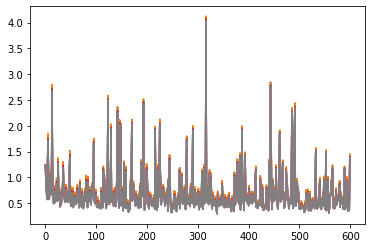

In [15]:
encoder_list=[]
encoder_list_l=[]
scalar = StandardScaler()
scalar.fit(train)
train=scalar.transform(train)
test=scalar.transform(test)
for i in PCAs:
  enc_train=np.array(train,dtype="float32")
  enc_test=np.array(test,dtype="float32")
  
  #converting to tensors 
  enc_train=torch.from_numpy(enc_train)
  enc_test =torch.from_numpy(enc_test)

  #encoder_decoder_network
  loss_item_l,encode_train_l,encode_test_l,decode_train_l,decode_test_l=autoencoder(enc_train,enc_test,y_train,y_test,100,i[4],1,1)  #train,test,train_label,test_label,batch_size,hid_nodes,epochs,linear
  loss_item,encode_train,encode_test,decode_train,decode_test=autoencoder(enc_train,enc_test,y_train,y_test,100,i[4],1,0)  #train,test,train_label,test_label,batch_size,hid_nodes,epochs,linear
  
  #plotting losses for linear and non-linear functions
  plt.plot(loss_item)
  plt.plot(loss_item_l)

  #saving both data to list to use further
  encoder_list_l.append([i[0],encode_train_l,encode_test_l,decode_train_l,decode_test_l])
  encoder_list.append([i[0],encode_train,encode_test,decode_train,decode_test])

Executing encoder on feedforward network

In [16]:
print('Feedforward Net using Non-Linear function:')
for i in encoder_list:
  #encoded data on simple feedforward network 
  losses,feed_train_acc,feed_test_acc = Model(i[1],i[2],y_train,y_test,20,lr=0.01) #train_data,test_data,train_labels,test_labels,epochs
  print('Variance: ',i[0],', train_acc:',feed_train_acc,', test_acc:',feed_test_acc)

print('Feedforward Net using Linear function:')
for i in encoder_list_l:
  #encoded data on simple feedforward network 
  losses,feed_train_acc,feed_test_acc = Model(i[1],i[2],y_train,y_test,20,lr=0.01) #train_data,test_data,train_labels,test_labels,epochs
  print('Variance: ',i[0],', train_acc:',feed_train_acc,', test_acc:',feed_test_acc)

Feedforward Net using Non-Linear function:
Variance:  0.5 , train_acc: 0.8306833333333333 , test_acc: 0.8297
Variance:  0.75 , train_acc: 0.8437666666666667 , test_acc: 0.8521
Variance:  0.9 , train_acc: 0.8467666666666667 , test_acc: 0.8529
Variance:  0.95 , train_acc: 0.8589166666666667 , test_acc: 0.8646
Feedforward Net using Linear function:
Variance:  0.5 , train_acc: 0.8425333333333334 , test_acc: 0.8468
Variance:  0.75 , train_acc: 0.8664 , test_acc: 0.8717
Variance:  0.9 , train_acc: 0.8667166666666667 , test_acc: 0.8743
Variance:  0.95 , train_acc: 0.86955 , test_acc: 0.8745


Visualization of decoded images from autoencoder network

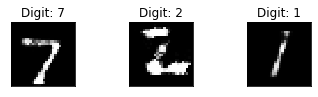

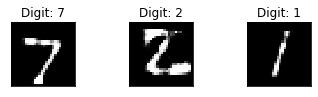

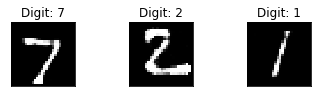

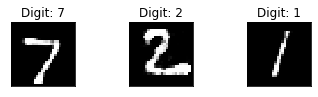

In [17]:
for i in encoder_list:
  digits=i[4]
  digits=digits.detach().numpy()
  digits=digits.reshape((10000,28,28))
  fig = plt.figure()
  for i in range(3):
    plt.subplot(3,3,i+1)
    plt.imshow(digits[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_test[i]))
    plt.xticks([])
    plt.yticks([])

Above is the Vizualization of Reconstructed images using autoencoder. <br> Variances are accordingly as follows: <br>
1st row- 0.50<br>
2nd row- 0.75<br>
3rd row- 0.90<br>
4th row- 0.95

Decoded data from encoder network, is passed to CNN network to classify images.

1. Network using Non-Linear Functions

In [0]:
print('CNN Net on Non-Linear functions:')
for i in encoder_list:
  #data manipulated for standard scaling, and again converted to vector
  decode_train_=i[3].reshape((60000,784))
  decode_test_=i[4].reshape((10000,784))

  decode_train_=decode_train_.detach().numpy()
  decode_test_=decode_test_.detach().numpy()

  scalar = StandardScaler()
  scalar.fit(decode_train_)
  decode_train_=scalar.transform(decode_train_)
  decode_test_=scalar.transform(decode_test_)

  decode_train=torch.from_numpy(decode_train_)
  decode_test=torch.from_numpy(decode_test_)

  # decode_train=decode_train+abs(torch.min(decode_train).item())
  # decode_train = decode_train / torch.max(decode_train).item()
  decode_train = decode_train.reshape((decode_train.shape[0],1,28,28))
  decode_test = decode_test.reshape((decode_test.shape[0],1,28,28))

  losses,cnn_train_acc,cnn_test_acc = cnn_Model(decode_train,decode_test,y_train,y_test,5,1000,4,2,0.01,'cuda') #epochs,batch_size,filter_size,pool_size
  print('Variance: ',i[0],', train_acc:',cnn_train_acc,', test_acc:',cnn_test_acc)

CNN Net on Non-Linear functions:
Variance:  0.5 , train_acc: 0.9394 , test_acc: 0.9394
Variance:  0.75 , train_acc: 0.9463166666666667 , test_acc: 0.9463166666666667
Variance:  0.9 , train_acc: 0.9466833333333333 , test_acc: 0.9466833333333333
Variance:  0.95 , train_acc: 0.9380666666666667 , test_acc: 0.9380666666666667


2. Network using Linear Functions

In [0]:
print('CNN Net on Linear functions:')
for i in encoder_list_l:
  #data manipulated for standard scaling, and again converted to vector
  decode_train_=i[3].reshape((60000,784))
  decode_test_=i[4].reshape((10000,784))

  decode_train_=decode_train_.detach().numpy()
  decode_test_=decode_test_.detach().numpy()

  scalar = StandardScaler()
  scalar.fit(decode_train_)
  decode_train_=scalar.transform(decode_train_)
  decode_test_=scalar.transform(decode_test_)

  decode_train=torch.from_numpy(decode_train_)
  decode_test=torch.from_numpy(decode_test_)

  # decode_train=decode_train+abs(torch.min(decode_train).item())
  # decode_train = decode_train / torch.max(decode_train).item()
  decode_train = decode_train.reshape((decode_train.shape[0],1,28,28))
  decode_test = decode_test.reshape((decode_test.shape[0],1,28,28))

  losses,cnn_train_acc,cnn_test_acc = cnn_Model(decode_train,decode_test,y_train,y_test,5,1000,4,2,0.01,'cuda') #epochs,batch_size,filter_size,pool_size
  print('Variance: ',i[0],', train_acc:',cnn_train_acc,', test_acc:',cnn_test_acc)

CNN Net on Linear functions:
Variance:  0.5 , train_acc: 0.9494666666666667 , test_acc: 0.9494666666666667
Variance:  0.75 , train_acc: 0.9475666666666667 , test_acc: 0.9475666666666667
Variance:  0.9 , train_acc: 0.9434333333333333 , test_acc: 0.9434333333333333
Variance:  0.95 , train_acc: 0.9450333333333333 , test_acc: 0.9450333333333333
